# Setup & Data Loading

In [3]:
pip install pandas openpyxl

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Setting for a clean and professional look
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})

In [7]:
import pandas as pd

file_path = r"C:\Users\yungs\OneDrive\Documents\SQL Portfolio\Onyx Data -DataDNA Dataset Challenge - Merchandise Sales Dataset - January 2025\Onyx Data -DataDNA Dataset Challenge - Merchandise Sales Dataset - January 2025.xlsx"
xls = pd.ExcelFile(file_path)

print(xls.sheet_names)  # Check if the file loads


['Data', 'Dictionary']


In [8]:
df = pd.read_excel(xls, sheet_name="Data")
print(df.head())
print(df.info())

   Order ID Order Date Product ID Product Category Buyer Gender  Buyer Age  \
0    189440 2024-07-21     BF1543         Clothing         Male         30   
1    187385 2024-07-20     BF1543         Clothing         Male         32   
2    181844 2024-07-21     BF1544            Other       Female         26   
3    197934 2024-08-19     BF1544            Other         Male         28   
4    122470 2024-01-06     BF1545            Other       Female         19   

  Order Location   Latitude   Longitude International Shipping  Sales Price  \
0     New Jersey  39.833851  -74.871826                     No          100   
1      Las Vegas  36.188110 -115.176468                     No          100   
2        Cardiff  51.481583   -3.179090                    Yes            9   
3     Pittsburgh  40.440620  -79.995890                     No            9   
4          Miami  25.761681  -80.191788                     No           10   

   Shipping Charges  Sales per Unit  Quantity  Total Sal

# Data Cleaning & Processing

In [9]:
print(df.isnull().sum()) # Count missing values per column

Order ID                  0
Order Date                0
Product ID                0
Product Category          0
Buyer Gender              0
Buyer Age                 0
Order Location            0
Latitude                  0
Longitude                 0
International Shipping    0
Sales Price               0
Shipping Charges          0
Sales per Unit            0
Quantity                  0
Total Sales               0
Rating                    0
Review                    0
dtype: int64


In [10]:
print(df.duplicated().sum()) # Count of duplicate rows
#df = df.drop_duplicates() If there are duplicates

0


In [11]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
print(df.columns) #Verify Changes

Index(['order_id', 'order_date', 'product_id', 'product_category',
       'buyer_gender', 'buyer_age', 'order_location', 'latitude', 'longitude',
       'international_shipping', 'sales_price', 'shipping_charges',
       'sales_per_unit', 'quantity', 'total_sales', 'rating', 'review'],
      dtype='object')


In [12]:
print(df.dtypes)

order_id                           int64
order_date                datetime64[ns]
product_id                        object
product_category                  object
buyer_gender                      object
buyer_age                          int64
order_location                    object
latitude                         float64
longitude                        float64
international_shipping            object
sales_price                        int64
shipping_charges                   int64
sales_per_unit                     int64
quantity                           int64
total_sales                        int64
rating                             int64
review                            object
dtype: object


In [13]:
print(df.isnull().sum())

order_id                  0
order_date                0
product_id                0
product_category          0
buyer_gender              0
buyer_age                 0
order_location            0
latitude                  0
longitude                 0
international_shipping    0
sales_price               0
shipping_charges          0
sales_per_unit            0
quantity                  0
total_sales               0
rating                    0
review                    0
dtype: int64


# Exploratory Data Analysis (EDA)

print(df["buyer_gender"].unique())
print(df["international_shipping"].unique())

In [14]:
print(df["rating"].unique())

[4 3 2 5 1]


# Sales Trend Analysis

In [15]:
df["year_month"] = df["order_date"].dt.to_period("M") # Creates YYYY-MM format
monthly_sales = df.groupby("year_month")["total_sales"].sum().reset_index()

print(monthly_sales.head()) # Preview Monthly Sales

  year_month  total_sales
0    2023-11        62358
1    2023-12        73033
2    2024-01        71802
3    2024-02        68089
4    2024-03        73291


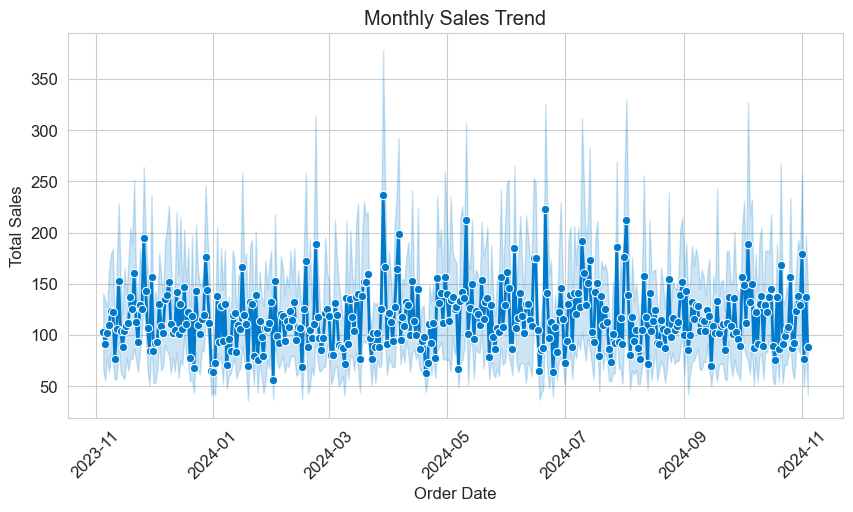

In [16]:
plt.figure(figsize = (10, 5))
sns.lineplot(data = df, x = 'order_date', y = 'total_sales', marker = 'o', color = '#007acc', linewidth = 2)
plt.xlabel("Order Date")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend")
plt.xticks(rotation = 45)
# plt.savefig("monthly_sales_trend.png")
plt.show()

# Product Performance Analysis

In [17]:
category_sales = df.groupby("product_category")["total_sales"].sum().reset_index()
category_sales = category_sales.sort_values(by = "total_sales", ascending = False)

print(category_sales.head())

  product_category  total_sales
0         Clothing       637201
1        Ornaments       155804
2            Other        63457


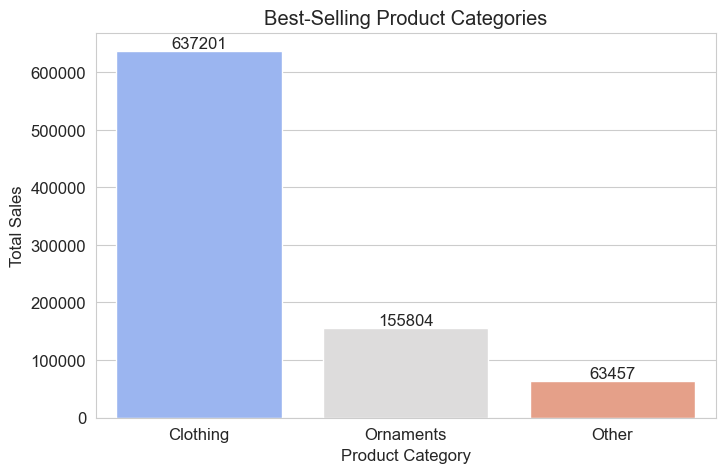

In [18]:
plt.figure(figsize = (8, 5))
ax = sns.barplot(data = df.groupby("product_category")["total_sales"].sum().reset_index(),
                x = "product_category", y = "total_sales", palette = "coolwarm")
ax.bar_label(ax.containers[0])
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.title("Best-Selling Product Categories")
#plt.savefig("best_selling_product_categories.png")
plt.show()

In [19]:
product_sales = df.groupby("product_id")["total_sales"].sum().reset_index()
product_sales = product_sales.sort_values(by = "total_sales", ascending = False)

print("Top 5 Best-Selling Products:")
print(product_sales.head())

print("\nBottom 5 Least-Selling Products:")
print(product_sales.tail())

Top 5 Best-Selling Products:
  product_id  total_sales
5     BF1548       190640
0     BF1543       144395
7     BF1550       139691
6     BF1549        88790
3     BF1546        73685

Bottom 5 Least-Selling Products:
   product_id  total_sales
11     BF1554        27070
2      BF1545        26630
4      BF1547        26554
10     BF1553        23505
12     BF1555         8666


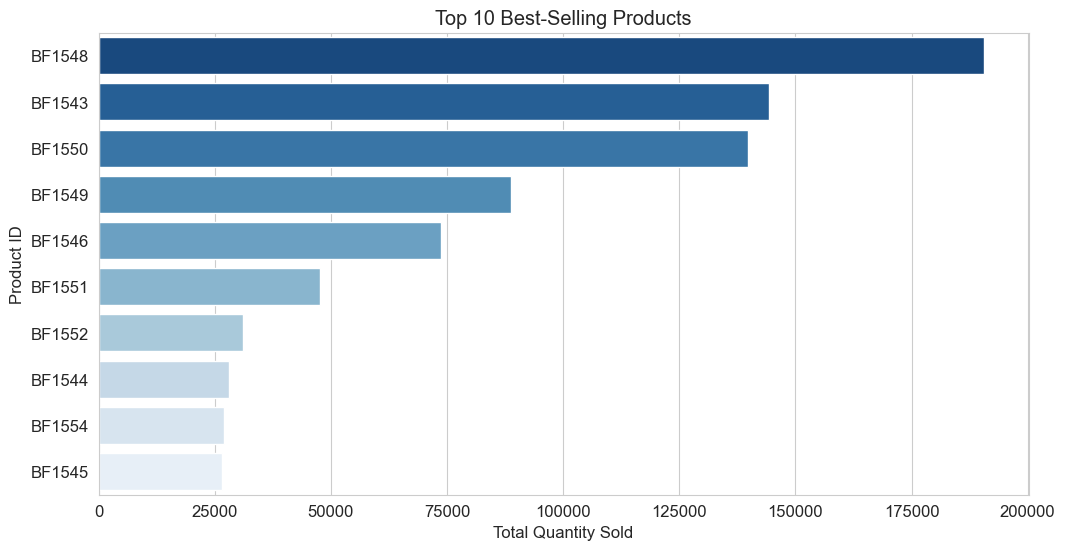

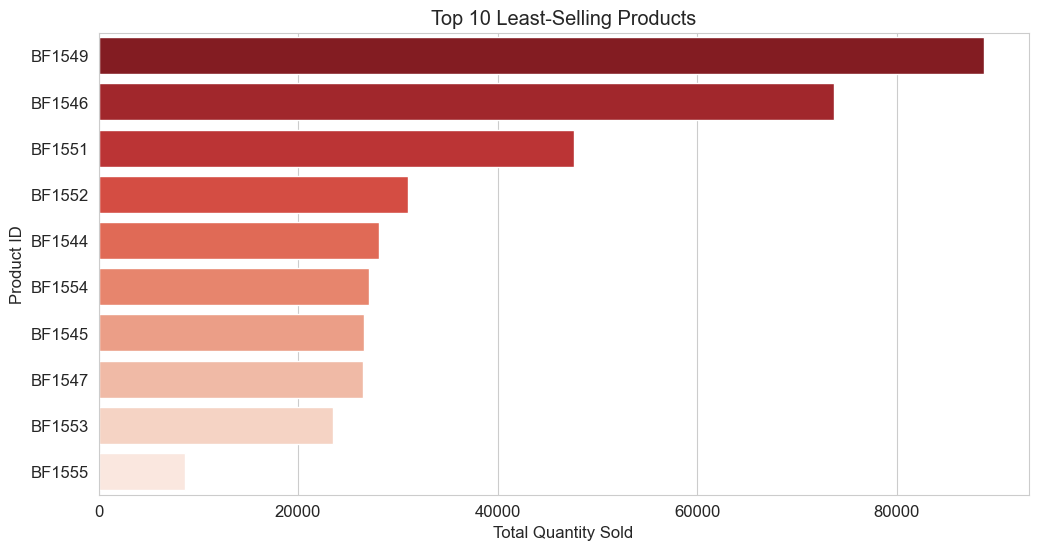

In [20]:
plt.figure(figsize = (12, 6))

# Top 10 Best_Selling Products
sns.barplot(data = product_sales.head(10), x = "total_sales", y = "product_id", palette = "Blues_r")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product ID")
plt.title("Top 10 Best-Selling Products")
plt.savefig("top10_best_selling_products.png")
plt.show()

# Bottom 10 Least-Selling Products
plt.figure(figsize = (12, 6))
sns.barplot(data = product_sales.tail(10), x = "total_sales", y = "product_id", palette = "Reds_r")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product ID")
plt.title("Top 10 Least-Selling Products")
plt.savefig("top10_least_selling_products.png")
plt.show()

# Geographical Sales Analysis

In [21]:
location_sales = df.groupby("order_location")["total_sales"].sum().reset_index()
location_sales = location_sales.sort_values(by = "total_sales", ascending = False)

print("Top 5 Location by Sales:")
print(location_sales.head())

Top 5 Location by Sales:
   order_location  total_sales
23         Sydney        48049
22  San Francisco        41321
15     New Jersey        39889
13         Mumbai        38115
20     Sacramento        37756


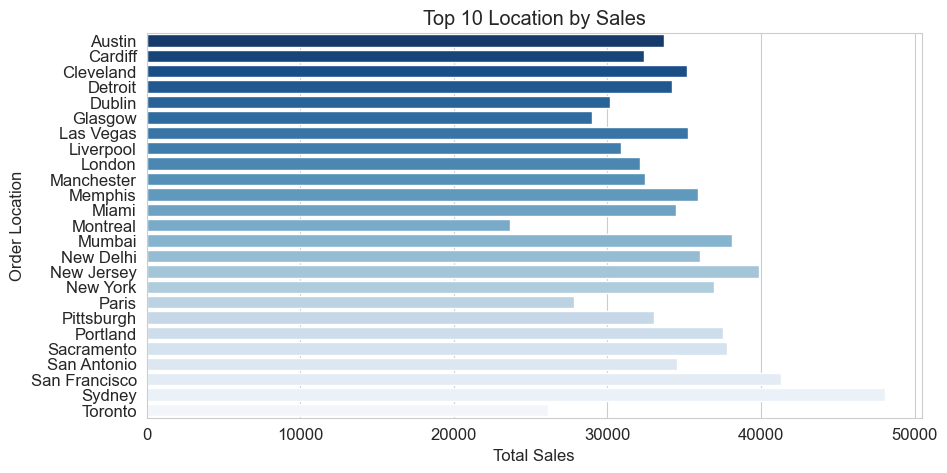

In [22]:
top_locations = df.groupby("order_location")["total_sales"].sum().reset_index()
plt.figure(figsize = (10, 5))
sns.barplot(data = top_locations, x = "total_sales", y = "order_location", palette = "Blues_r")
plt.xlabel("Total Sales")
plt.ylabel("Order Location")
plt.title("Top 10 Location by Sales")
# plt.savefig("top10_locations_by_sales.png")
plt.show()

# Shipping Impact on Sales

In [23]:
shipping_sales = df.groupby("international_shipping")["total_sales"].sum().reset_index()
print(shipping_sales)

  international_shipping  total_sales
0                     No       469606
1                    Yes       386856


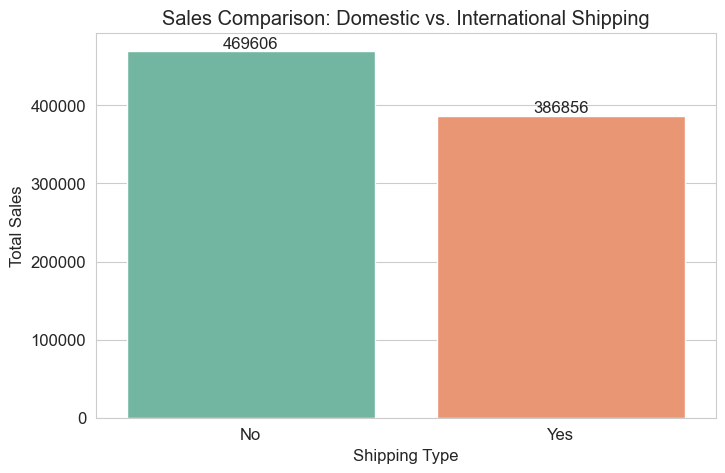

In [24]:
plt.figure(figsize = (8, 5))
ax = sns.barplot(data = df.groupby("international_shipping")["total_sales"].sum().reset_index(),
                 x = "international_shipping", y = "total_sales", palette = "Set2")
ax.bar_label(ax.containers[0])
plt.xlabel("Shipping Type")
plt.ylabel("Total Sales")
plt.title("Sales Comparison: Domestic vs. International Shipping")
# plt.savefig("domestic_vs_internationalshipping.png")
plt.show()

# Customer Demographics & Behavior

In [25]:
gender_sales = df.groupby("buyer_gender")["total_sales"].sum().reset_index()
print(gender_sales)

  buyer_gender  total_sales
0       Female       256133
1         Male       600329


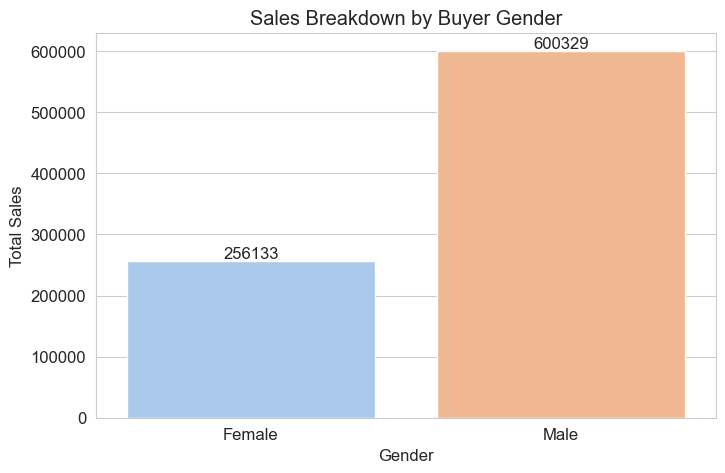

In [26]:
plt.figure(figsize = (8, 5))
ax = sns.barplot(data = gender_sales, x = "buyer_gender", y = "total_sales", palette = "pastel")
ax.bar_label(ax.containers[0])
plt.xlabel("Gender")
plt.ylabel("Total Sales")
plt.title("Sales Breakdown by Buyer Gender")
# plt.savefig("sales_by_buyer_gender.png")
plt.show()

In [27]:
bins = (0, 18, 25, 35, 45, 55, 65, 100) # Age Ranges
labels = ["<18", "18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
df["age_group"] = pd.cut(df["buyer_age"], bins = bins, labels = labels, right = False)

age_sales = df.groupby("age_group")["total_sales"].sum().reset_index()
print(age_sales)

  age_group  total_sales
0       <18            0
1     18-24       336845
2     25-34       468955
3     35-44        50662
4     45-54            0
5     55-64            0
6       65+            0


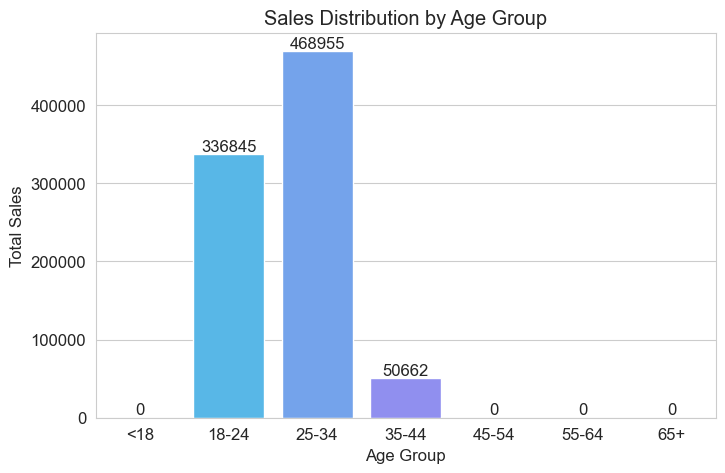

In [28]:
plt.figure(figsize = (8, 5))
ax = sns.barplot(data = age_sales, x = "age_group", y = "total_sales", palette = "cool")
ax.bar_label(ax.containers[0])
plt.xlabel("Age Group")
plt.ylabel("Total Sales")
plt.title("Sales Distribution by Age Group")
# plt.savefig("sales_distribution_by_age_group.png")
plt.show()

# Impact of Ratings and Discounts on Sales

In [29]:
rating_sales = df.groupby("rating")["total_sales"].mean().reset_index()
print(rating_sales)

   rating  total_sales
0       1   113.996320
1       2   118.765789
2       3   114.468218
3       4   114.455725
4       5   117.822242


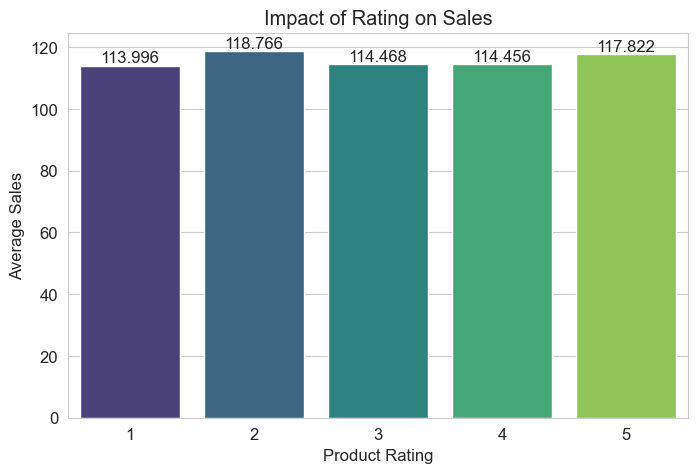

In [30]:
plt.figure(figsize = (8, 5))
ax = sns.barplot(data = rating_sales, x = "rating", y = "total_sales", palette = "viridis")
ax.bar_label(ax.containers[0])
plt.xlabel("Product Rating")
plt.ylabel("Average Sales")
plt.title("Impact of Rating on Sales")
# plt.savefig("impact_rating_on_sales.png")
plt.show()

In [31]:
shipping_analysis = df.groupby("shipping_charges")["total_sales"].mean().reset_index()
print(shipping_analysis)

   shipping_charges  total_sales
0                 0    91.380813
1                25   133.889785
2                40   160.217652
3                50   162.906433
4                70   205.454294
5               100   261.135870


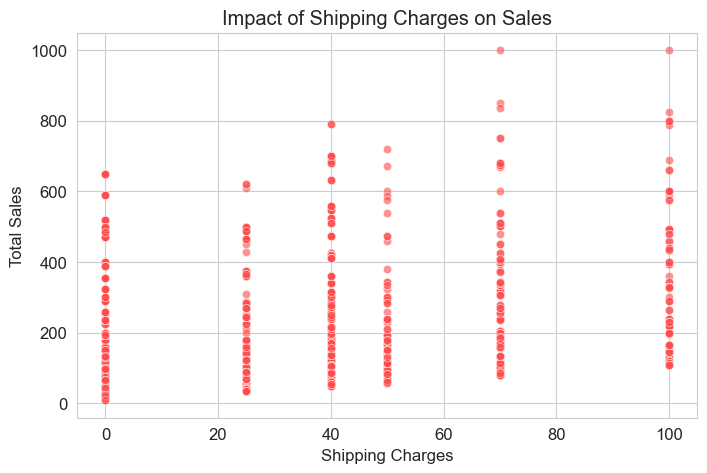

In [32]:
plt.figure(figsize = (8, 5))
sns.scatterplot(data = df, x = "shipping_charges", y = "total_sales", alpha = 0.6, color = "#ff4c4c")
plt.xlabel("Shipping Charges")
plt.ylabel("Total Sales")
plt.title("Impact of Shipping Charges on Sales")
# plt.savefig("impact_shipping_charges_on_sales.png")
plt.show()

In [33]:
df["discount"] = ((df["sales_price"] - df["total_sales"]) / df["sales_price"]) * 100
df["discount"] = df["discount"].round(2) # Round to 2 decimals

In [34]:
discount_sales = df.groupby("discount")["total_sales"].mean().reset_index()
print(discount_sales)

     discount  total_sales
0    -4744.44   436.000000
1    -4300.00   440.000000
2    -4288.89   395.000000
3    -3900.00   400.000000
4    -3733.33   575.000000
..        ...          ...
208    -25.77   122.000000
209    -25.00   125.000000
210    -21.19   143.000000
211    -19.23   155.000000
212      0.00    55.493592

[213 rows x 2 columns]


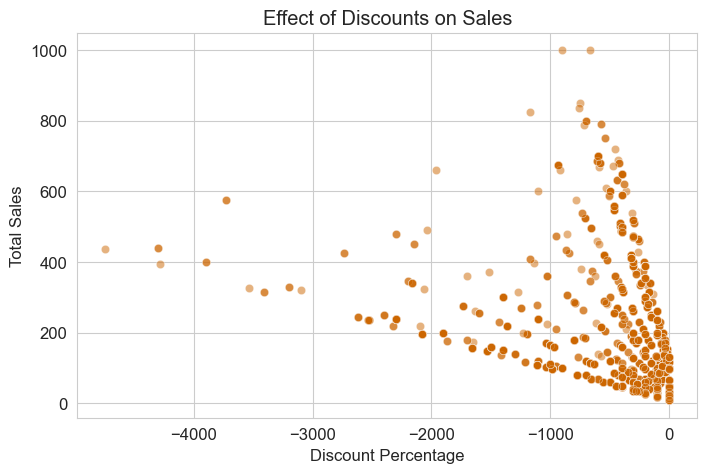

In [35]:
plt.figure(figsize = (8, 5))
sns.scatterplot(data = df, x = "discount", y = "total_sales", alpha = 0.5, color = "#cc6600")
plt.xlabel("Discount Percentage")
plt.ylabel("Total Sales")
plt.title("Effect of Discounts on Sales")
# plt.savefig("effect_discount_on_sales.png")
plt.show()

In [36]:
repeat_customers = df.groupby(["order_location", "buyer_gender", "buyer_age"])["order_id"].count().reset_index()
repeat_customers.columns = ["order_location", "buyer_gender", "buyer_age", "purchase_count"]

print(repeat_customers["purchase_count"].value_counts()) # Check distribution purchase

purchase_count
5     93
4     87
6     76
3     76
7     68
9     60
8     54
2     48
10    46
11    39
1     33
17    29
14    29
15    25
12    22
13    22
16    18
18    17
20    15
19    12
21     7
24     4
23     3
22     2
26     2
25     2
27     1
Name: count, dtype: int64


In [37]:
loyal_customers = repeat_customers[repeat_customers["purchase_count"] > 1]
print("Number of Repeat Customers:", len(loyal_customers))

Number of Repeat Customers: 857


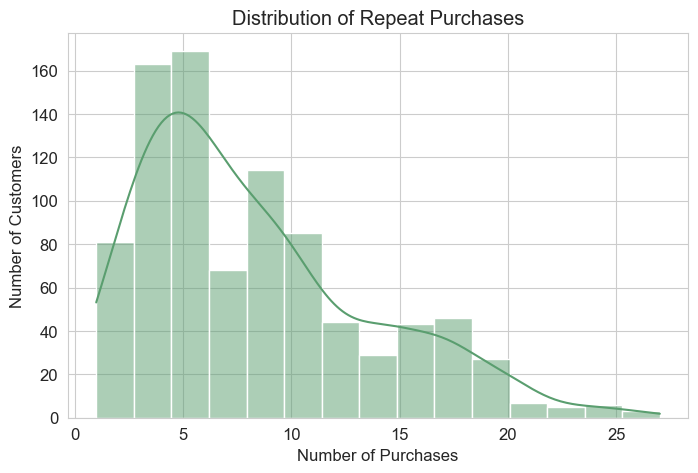

In [38]:
plt.figure(figsize = (8,5))
sns.histplot(repeat_customers["purchase_count"], bins = 15, kde = True, color = "#5a9e6f")
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Customers")
plt.title("Distribution of Repeat Purchases")
# plt.savefig("distribution_repeat_purchases.png")
plt.show()

# Word Cloud for Customer Reviews 

In [39]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



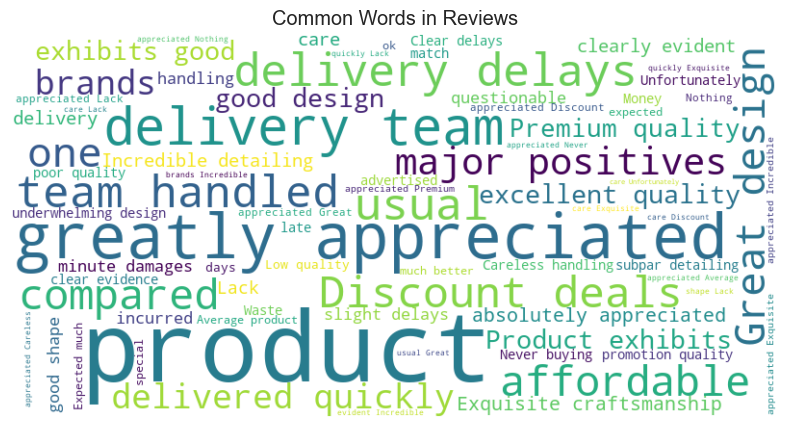

In [40]:
from wordcloud  import WordCloud 

# Combine all reviews intro single Text
text = " ".join(df["review"].dropna())

# Generate word cloud
wordcloud = WordCloud(width = 800, height = 400, background_color = "white").generate(text)

# Display word cloud
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.title("Common Words in Reviews")
plt.show()